In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import bioinfokit
from bioinfokit import analys, visuz

In [2]:
df = pd.read_csv("http://www.mghassany.com/MLcourseEfrei/datasets/ligue1_17_18.csv", sep=";")
df[0:2]

,Team,Points,Wins,Draws,Loses,Goals.scored,Goals.conceded,Difference.goals,Points.per.game,red.cards,...,clean.sheets.percentage,failed.to.score.percentage,shots.per.match.average,shots.on.goal.per.match.average,ball.possession.per.game.average,sum.offside.in.attack,sum.offside.in.defense,corners.per.game.average,fouls.for.sum,fouls.against.sum
0,Paris-SG,93,29,6,3,108,29,79,2.45,6,...,47,8,16.05,6.74,63.34,98,99,6.71,139,105
1,Monaco,80,24,8,6,85,45,40,2.11,3,...,37,11,15.68,3.18,57.68,93,90,6.39,115,112


In [3]:
df.columns

Index(['Team', 'Points', 'Wins', 'Draws', 'Loses', 'Goals.scored',
       'Goals.conceded', 'Difference.goals', 'Points.per.game', 'red.cards',
       'yellow.cards', 'clean.sheets.percentage', 'failed.to.score.percentage',
       'shots.per.match.average', 'shots.on.goal.per.match.average',
       'ball.possession.per.game.average', 'sum.offside.in.attack',
       'sum.offside.in.defense', 'corners.per.game.average', 'fouls.for.sum',
       'fouls.against.sum'],
      dtype='object')

In [4]:
pointsCards = df[['Points', 'yellow.cards']]
pointsCards

,Points,yellow.cards
0,93,66
1,80,70
2,78,70
3,77,79
4,58,63
5,55,73
6,55,72
7,54,83
8,52,63
9,51,72


In [5]:
km = KMeans(n_clusters=2, n_init=20)
km = km.fit(pointsCards)
print(km.labels_)

[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
print(km.cluster_centers_)

[[82.     71.25  ]
 [44.75   71.5625]]


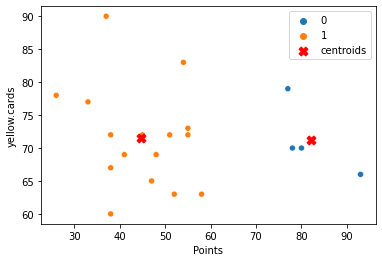

In [7]:
sns.scatterplot(data = pointsCards, x='Points', y='yellow.cards', hue = km.predict(pointsCards))
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

In [8]:
km3 = KMeans(n_clusters=3, n_init=20)
km3 = km3.fit(pointsCards)
print(km3.labels_)

[2 2 2 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [9]:
print(km3.cluster_centers_)

[[51.66666667 70.22222222]
 [35.85714286 73.28571429]
 [82.         71.25      ]]


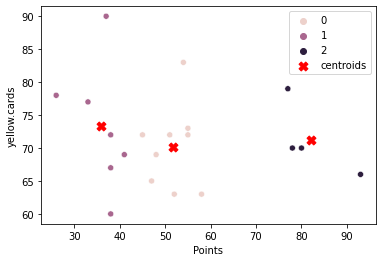

In [10]:
sns.scatterplot(data = pointsCards, x='Points', y='yellow.cards', hue = km3.predict(pointsCards))

plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()

In [11]:
km4 = KMeans(n_clusters=4, n_init=20)
km4 = km4.fit(pointsCards)
print(km4.labels_)

[0 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1 1 3 3 3]


In [12]:
print(km4.cluster_centers_)

[[82.         71.25      ]
 [41.16666667 67.5       ]
 [53.28571429 70.71428571]
 [32.         81.66666667]]


In [13]:
km4.cluster_centers_[2]

array([53.28571429, 70.71428571])

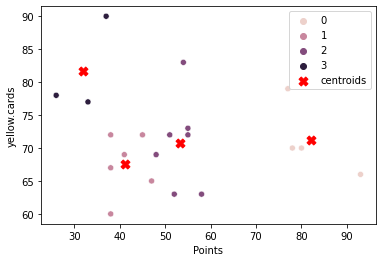

In [14]:
sns.scatterplot(data = pointsCards, x='Points', y='yellow.cards', hue = km4.predict(pointsCards))
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")


plt.legend()

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


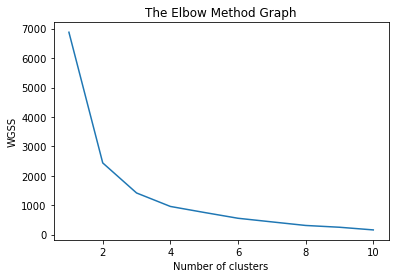

In [16]:
wgss=[]

#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and 
#appended to our wgss list.

for i in range(1,11): 
    kmeans = KMeans(
        n_clusters=i,
        init ='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0)
    
#i above is between 1-10 numbers. init parameter is the random #initialization method
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #Kmeans algorithm will be run with
#different initial centroid.
    kmeans.fit(pointsCards) #kmeans algorithm fits to the X dataset
    wgss.append(kmeans.inertia_)

#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
#4.Plot the elbow graph

plt.plot(range(1,11),wgss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WGSS')
plt.show()

In [17]:
#5 According to the Elbow graph we deterrmine the clusters number as 
#5. Applying k-means algorithm to the X dataset.

kmeans = KMeans(n_clusters=5,
                init ='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0 )

# We are going to use the fit predict method that returns for each 
#observation which cluster it belongs to. The cluster to which 
#client belongs and it will return this cluster numbers into a 
#single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(pointsCards)
y_kmeans

array([2, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0])

In [18]:
scaler = StandardScaler()
ligue1_scaled = scaler.fit_transform(df.loc[:, df.columns != 'Team']) 
ligue1_scaled

array([[ 2.37845286e+00,  2.51389675e+00, -1.35680105e+00,
        -1.93622157e+00,  2.67809310e+00, -1.87563570e+00,
         2.78265632e+00,  2.37663716e+00,  8.94736842e-01,
        -7.80554197e-01,  1.92185862e+00, -1.56002389e+00,
         2.35975132e+00,  2.90066301e+00,  2.58380613e+00,
         1.92189533e+00,  8.91620353e-01,  2.53537035e+00,
         2.98101197e+00,  1.28451703e-01],
       [ 1.62061249e+00,  1.66460731e+00, -6.03022689e-01,
        -1.41759079e+00,  1.58499388e+00, -5.50683330e-01,
         1.40893991e+00,  1.62565516e+00, -6.84210526e-01,
        -2.12878417e-01,  9.36290097e-01, -1.32063403e+00,
         2.14685008e+00, -1.14650936e+00,  1.48867788e+00,
         1.48805891e+00,  5.44986090e-01,  2.08848601e+00,
         9.85355422e-01,  6.01694820e-01],
       [ 1.50402166e+00,  1.49474942e+00, -2.26133508e-01,
        -1.41759079e+00,  1.68004598e+00, -7.16302377e-01,
         1.54983390e+00,  1.49312892e+00, -1.21052632e+00,
        -2.12878417e-01,  1.1

In [19]:
km.ligue1 = KMeans(n_clusters=3, n_init=20, random_state=300)

km.ligue1 = km.ligue1.fit(df.loc[:, df.columns != 'Team'])

print(km.ligue1)
print(km.ligue1.labels_)

KMeans(n_clusters=3, n_init=20, random_state=300)
[1 1 1 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0]


In [20]:
km.ligue1.scaled = KMeans(n_clusters=3, n_init=20, random_state=300)

km.ligue1.scaled = km.ligue1.scaled.fit(ligue1_scaled)

print(km.ligue1.scaled)
print(km.ligue1.scaled.labels_)

KMeans(n_clusters=3, n_init=20, random_state=300)
[2 2 2 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [39]:
pca = PCA(n_components=20)
#PCA is affected by scal so it's important to scale our data before applying the PCA 

pca_ligue1 = pca.fit_transform(ligue1_scaled)
pca_ligue1

array([[ 9.03595584e+00, -1.46042334e+00,  1.78337425e+00,
         9.13856284e-01, -9.85985862e-01, -1.65971669e-01,
        -5.88141496e-01,  4.48434518e-01, -3.57406947e-01,
        -2.36813713e-01, -1.29128632e-01, -1.01998469e-01,
        -3.29864372e-01,  5.23358889e-03,  1.39655301e-03,
         8.11773964e-03, -5.37258725e-05,  1.43498815e-16,
        -4.48232513e-18, -2.99577920e-19],
       [ 5.24558825e+00, -4.46383574e-01,  3.46470975e-01,
        -6.79403394e-01,  2.17285076e+00, -2.43909450e-01,
         7.83142997e-02, -1.13383817e+00,  9.46104779e-02,
        -6.38809932e-03,  4.42280818e-01, -3.38698769e-01,
         5.06603471e-02,  3.64788228e-02,  2.88200947e-02,
        -6.93130307e-03, -1.96667296e-04,  1.27167316e-16,
         2.00751241e-17,  8.21305097e-19],
       [ 5.29877644e+00,  2.04113970e-01,  4.95300648e-02,
         6.73161634e-02, -3.73379200e-01, -1.26752743e+00,
         2.39720169e-01,  8.44943677e-01,  4.26815849e-01,
        -3.33944422e-02, -1.7

In [38]:
pca_ligue1.explained_variance_ratio_

array([6.34593137e-01, 1.00676575e-01, 7.75083765e-02, 5.74316446e-02,
       3.80442505e-02, 2.85129591e-02, 2.43037159e-02, 1.84162404e-02,
       7.93715476e-03, 4.95284798e-03, 3.95698226e-03, 1.87170761e-03,
       1.35653144e-03, 3.10863203e-04, 1.01926703e-04, 2.50190962e-05,
       6.76392623e-08, 9.12453282e-34, 1.96531452e-34, 1.77271092e-36])

In [34]:
pca_df = pd.DataFrame(data=ligue1_scaled, 
  columns=['Points', 'Wins', 'Draws', 'Loses', 'Goals.scored',
       'Goals.conceded', 'Difference.goals', 'Points.per.game', 'red.cards',
       'yellow.cards', 'clean.sheets.percentage', 'failed.to.score.percentage',
       'shots.per.match.average', 'shots.on.goal.per.match.average',
       'ball.possession.per.game.average', 'sum.offside.in.attack',
       'sum.offside.in.defense', 'corners.per.game.average', 'fouls.for.sum',
       'fouls.against.sum'])

In [48]:
from pca import pca

In [62]:
labels = ['Points', 'Wins', 'Draws', 'Loses', 'Goals.scored',
       'Goals.conceded', 'Difference.goals', 'Points.per.game', 'red.cards',
       'yellow.cards', 'clean.sheets.percentage', 'failed.to.score.percentage',
       'shots.per.match.average', 'shots.on.goal.per.match.average',
       'ball.possession.per.game.average', 'sum.offside.in.attack',
       'sum.offside.in.defense', 'corners.per.game.average', 'fouls.for.sum',
       'fouls.against.sum']

[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [20] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[20]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


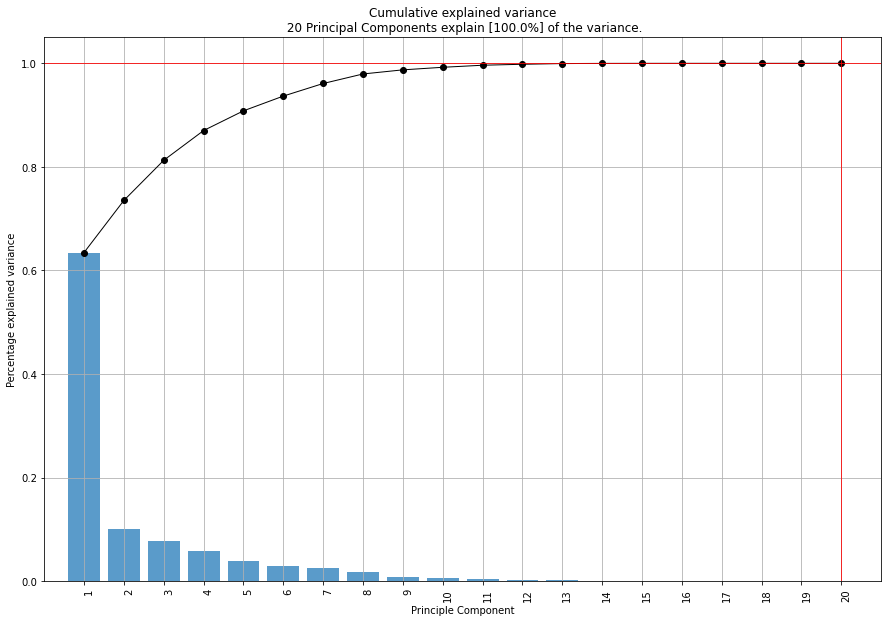

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

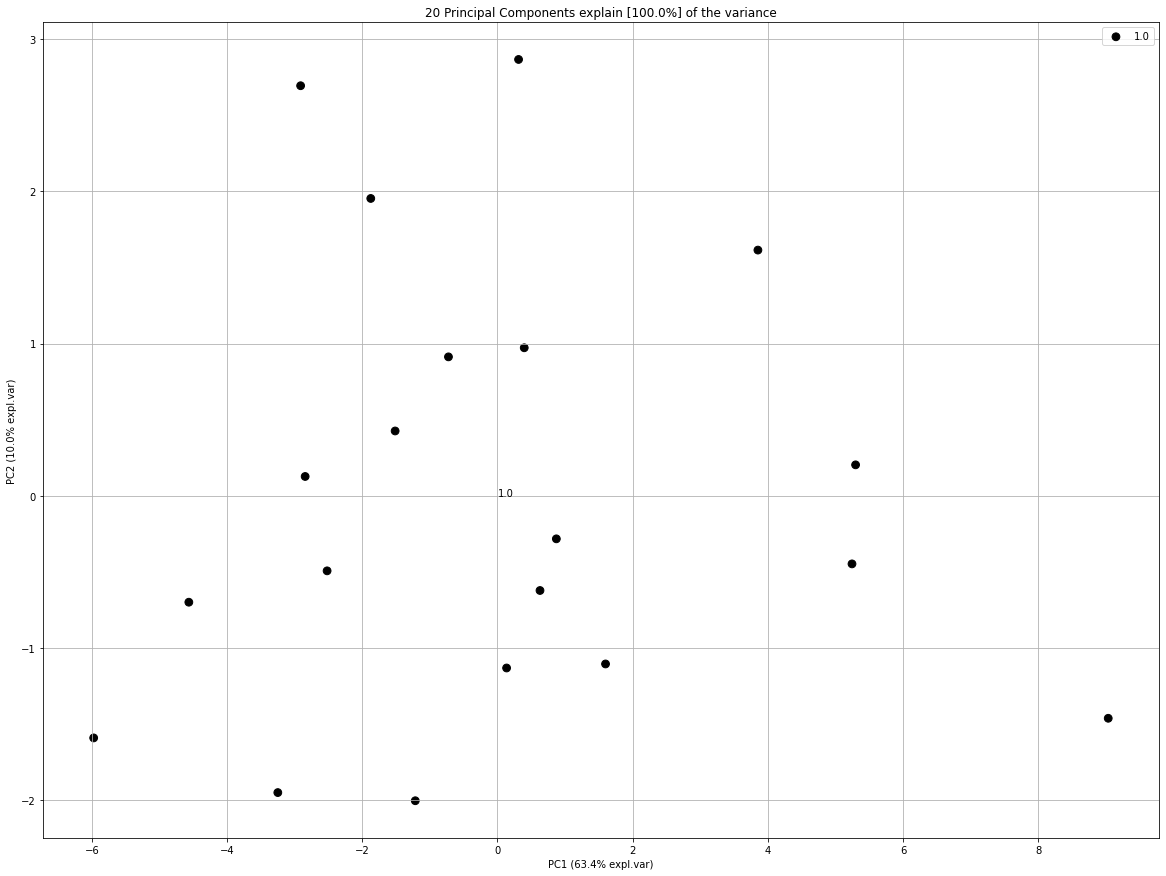

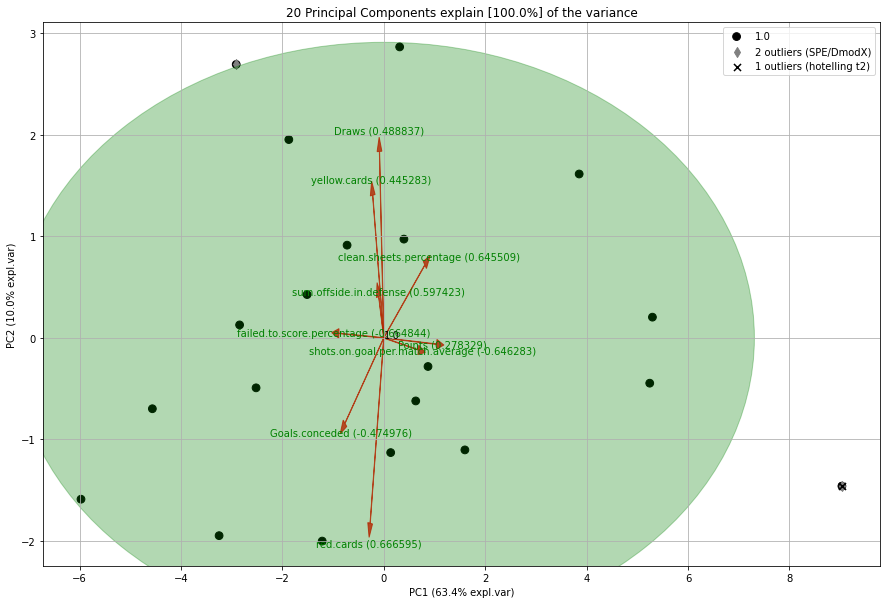

In [66]:
pca_ligue1 = pca(n_components=20)


results = pca_ligue1.fit_transform(ligue1_scaled, col_labels=labels)

# Plot explained variance
fig, ax = pca_ligue1.plot()

# Scatter first 2 PCs
fig, ax = pca_ligue1.scatter(gradient='#FFFFFF')

# Make biplot with the number of features
fig, ax = pca_ligue1.biplot(n_feat=9, SPE=True, hotellingt2=True)

In [71]:
results

{'loadings':         Points      Wins     Draws     Loses  Goals.scored  Goals.conceded  \
 PC1   0.278329  0.273714 -0.022545 -0.268237      0.254985       -0.203708   
 PC2  -0.016559 -0.089520  0.488837 -0.133116     -0.075497       -0.223924   
 PC3   0.025149  0.092616 -0.453906  0.113942      0.124077       -0.025777   
 PC4  -0.070924 -0.090580  0.144419  0.025946     -0.255740       -0.474976   
 PC5   0.061137  0.032438  0.179329 -0.115272      0.038934        0.047142   
 PC6   0.031605 -0.000963  0.210739 -0.095685     -0.230685       -0.308879   
 PC7   0.002710  0.056330 -0.357440  0.106625     -0.140118       -0.124827   
 PC8  -0.028180 -0.081576  0.360830 -0.082485      0.103137        0.190666   
 PC9   0.095245  0.105326 -0.085336 -0.068055      0.036297        0.288826   
 PC10 -0.150289 -0.112027 -0.225931  0.217652     -0.409579       -0.184856   
 PC11 -0.069961 -0.096593  0.190664  0.010853     -0.121727        0.442965   
 PC12  0.122060  0.123849 -0.035271 -0.1

In [77]:
print( pd.DataFrame(results['PC'][['PC1', 'PC2']]))

          PC1       PC2
1.0  9.035956 -1.460423
1.0  5.245588 -0.446384
1.0  5.298776  0.204114
1.0  3.853752  1.614519
1.0  1.599774 -1.103620
1.0  0.872143 -0.281849
1.0  0.630255 -0.621157
1.0  0.397094  0.972937
1.0  0.136131 -1.130109
1.0  0.313183  2.866500
1.0 -1.214550 -2.001967
1.0 -0.723872  0.913313
1.0 -1.512639  0.426570
1.0 -1.873157  1.953644
1.0 -2.843716  0.127685
1.0 -2.519142 -0.492035
1.0 -3.248221 -1.948378
1.0 -2.910794  2.694040
1.0 -4.564450 -0.698087
1.0 -5.972111 -1.589313


In [81]:
km.ligue1.pca = KMeans(n_clusters=3, n_init=20, random_state=300)

km.ligue1.pca = km.ligue1.pca.fit( pd.DataFrame(results['PC'][['PC1', 'PC2']] ))

print(km.ligue1.pca)
print(km.ligue1.pca.labels_)

KMeans(n_clusters=3, n_init=20, random_state=300)
[2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


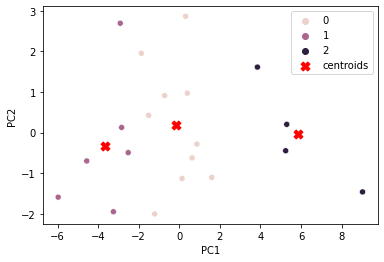

In [87]:
sns.scatterplot(data = pd.DataFrame(results['PC'][['PC1', 'PC2']]), 
                x='PC1', y='PC2', 
                hue = km.ligue1.pca.predict(pd.DataFrame(results['PC'][['PC1', 'PC2']])))

plt.scatter(km.ligue1.pca.cluster_centers_[:,0], km.ligue1.pca.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")


plt.legend()